In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
penguins=sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
columns=penguins.columns

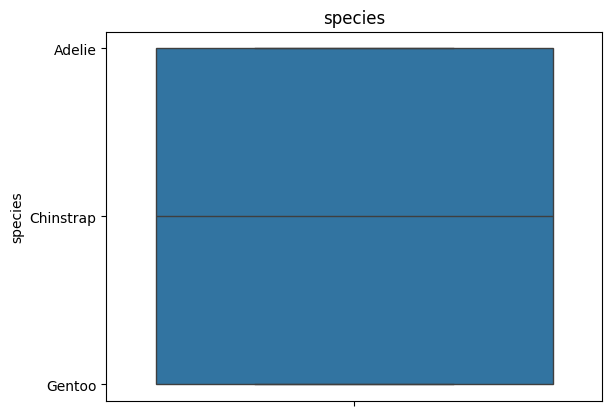

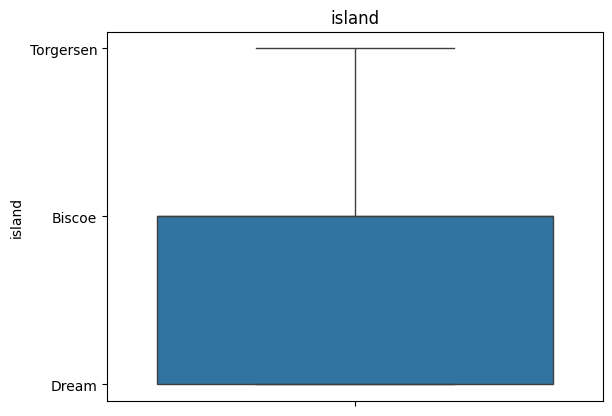

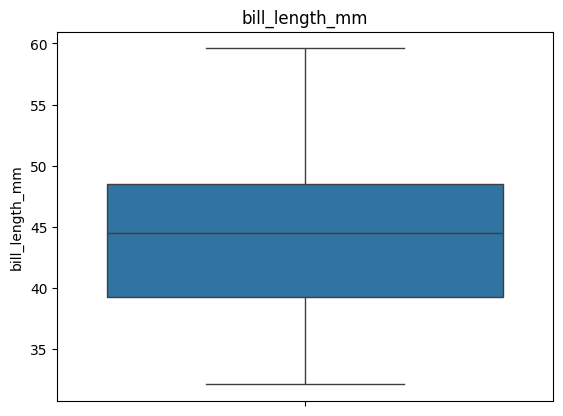

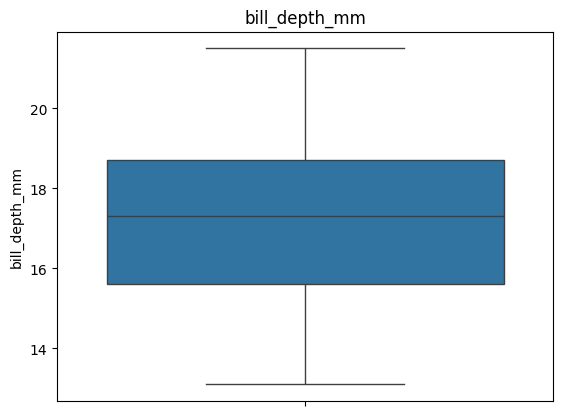

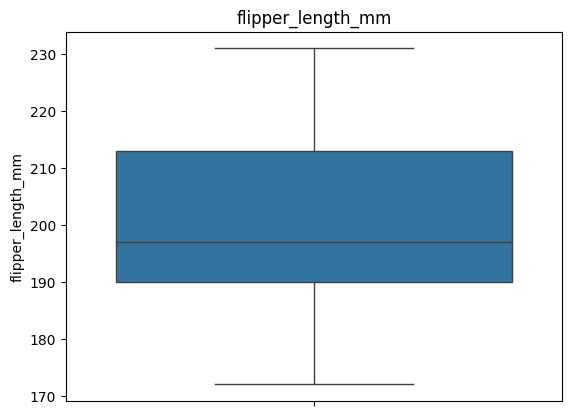

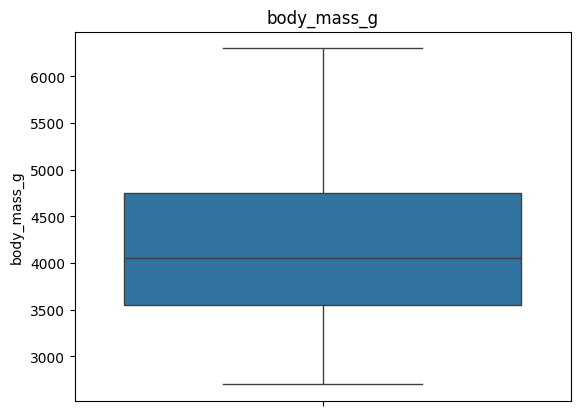

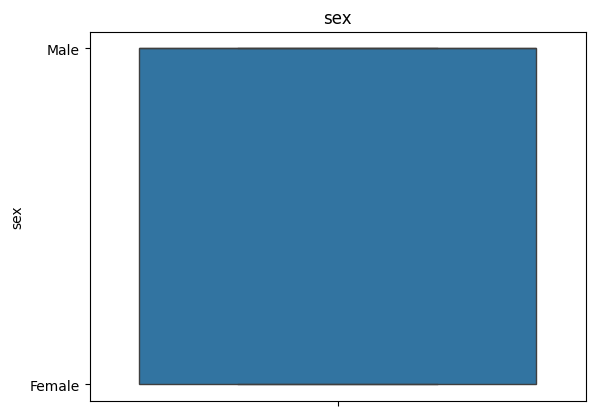

In [7]:
for col in columns:
     plt.figure()
     sns.boxplot(penguins[col])
     plt.title(f"{col}")
     plt.show()

In [8]:
penguins.nunique(dropna=False)

species                3
island                 3
bill_length_mm       165
bill_depth_mm         81
flipper_length_mm     56
body_mass_g           95
sex                    3
dtype: int64

In [9]:
continuous_data=penguins.select_dtypes(include=['int64','float64'])
continuous_data_columns=continuous_data.columns
continuous_data_columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

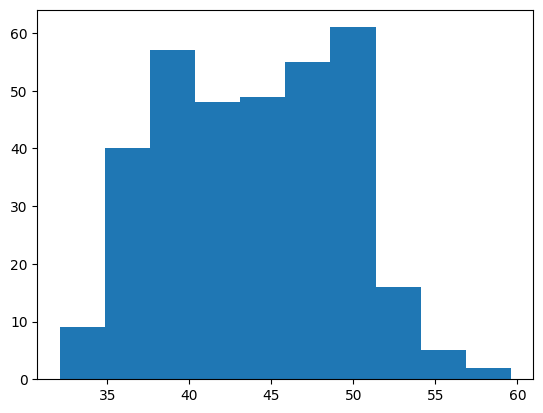

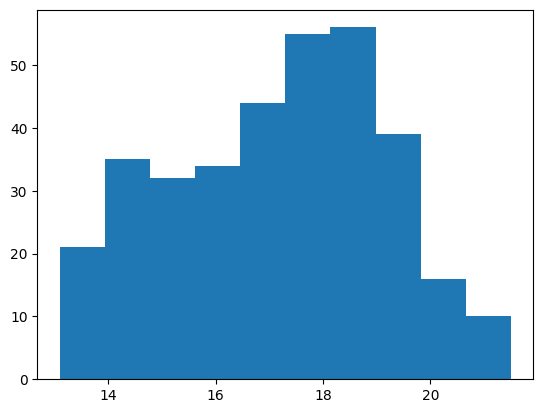

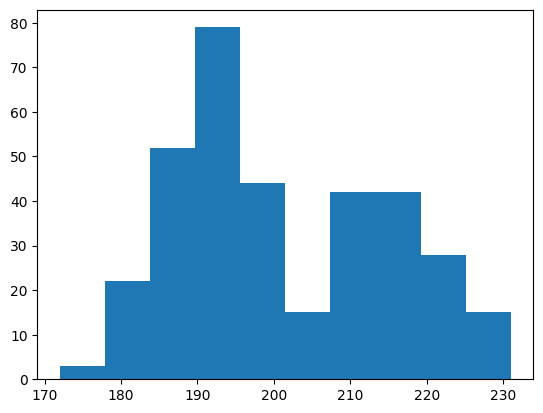

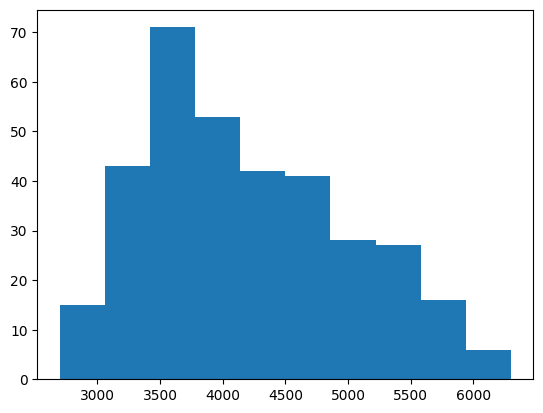

In [10]:
for col in continuous_data_columns:
      plt.hist(penguins[col])
      plt.show()         

In [11]:
num_columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'] 
penguins[num_columns]=penguins[num_columns].fillna(penguins[num_columns].mean())

In [12]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [13]:
penguins['sex']=penguins['sex'].fillna("unknown")

In [14]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,unknown
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,unknown
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()
penguins['sex']=le.fit_transform(penguins['sex'])
penguins['species']=le.fit_transform(penguins['species'])
penguins['island']=le.fit_transform(penguins['island'])

In [17]:
penguins.nunique()

species                3
island                 3
bill_length_mm       165
bill_depth_mm         81
flipper_length_mm     56
body_mass_g           95
sex                    3
dtype: int64

In [18]:
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,2
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


In [19]:
penguins.tail(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,2,0,43.92193,17.15117,200.915205,4201.754386,2
340,2,0,46.80000,14.30000,215.000000,4850.000000,0
341,2,0,50.40000,15.70000,222.000000,5750.000000,1
342,2,0,45.20000,14.80000,212.000000,5200.000000,0
343,2,0,49.90000,16.10000,213.000000,5400.000000,1


In [20]:
penguins.corr()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.635659,0.728674,-0.741335,0.851160,0.747726,0.008559
island,-0.635659,1.000000,-0.351461,0.567506,-0.562328,-0.558045,0.029246
bill_length_mm,0.728674,-0.351461,1.000000,-0.235053,0.656181,0.595110,0.266041
bill_depth_mm,-0.741335,0.567506,-0.235053,1.000000,-0.583851,-0.471916,0.305265
flipper_length_mm,0.851160,-0.562328,0.656181,-0.583851,1.000000,0.871202,0.211696
body_mass_g,0.747726,-0.558045,0.595110,-0.471916,0.871202,1.000000,0.354040
sex,0.008559,0.029246,0.266041,0.305265,0.211696,0.354040,1.000000


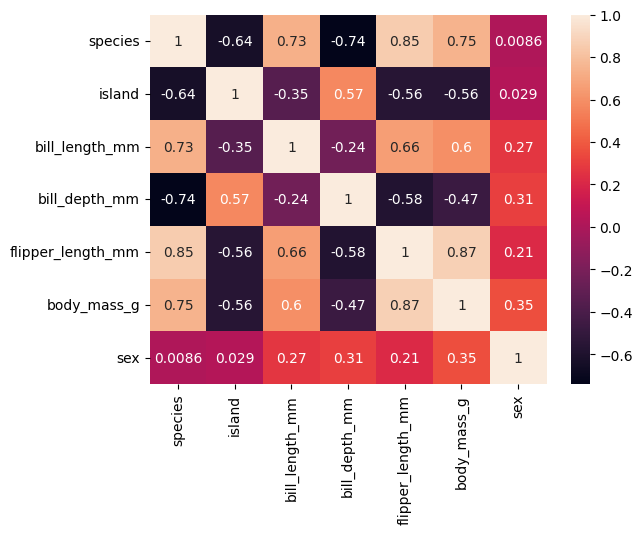

In [21]:

sns.heatmap(penguins.corr(),annot=True)
plt.show()

C:\Users\vinot\AppData\Local\Temp\ipykernel_19600\3320242688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins['bill_length_mm'])


<Axes: xlabel='bill_length_mm', ylabel='Density'>

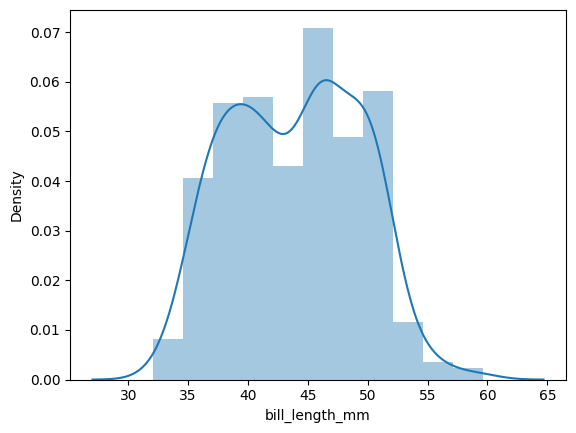

In [22]:
sns.distplot(penguins['bill_length_mm'])
   

C:\Users\vinot\AppData\Local\Temp\ipykernel_19600\3611062583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins['bill_depth_mm'])


<Axes: xlabel='bill_depth_mm', ylabel='Density'>

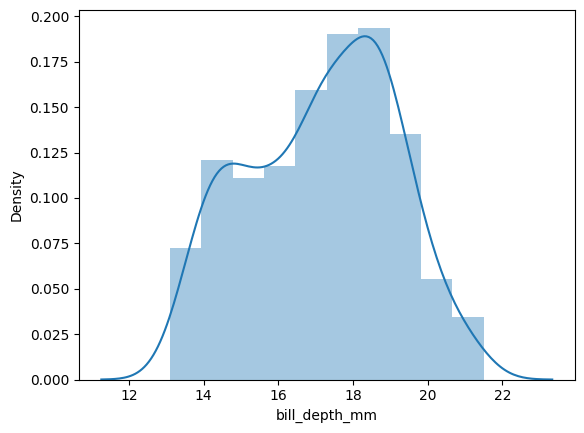

In [23]:
sns.distplot(penguins['bill_depth_mm'])


C:\Users\vinot\AppData\Local\Temp\ipykernel_19600\99200172.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins['flipper_length_mm'])


<Axes: xlabel='flipper_length_mm', ylabel='Density'>

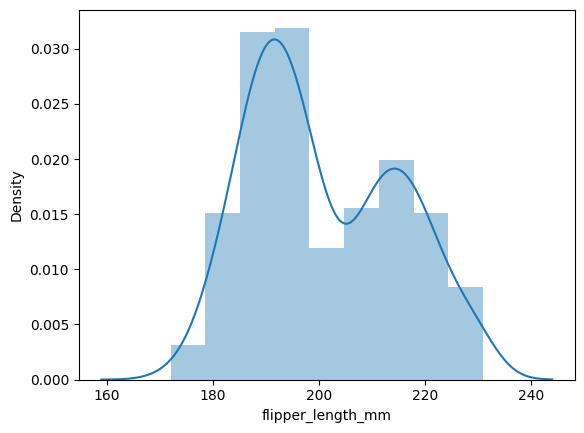

In [24]:
sns.distplot(penguins['flipper_length_mm'])
  

C:\Users\vinot\AppData\Local\Temp\ipykernel_19600\3657314963.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(penguins['body_mass_g'])


<Axes: xlabel='body_mass_g', ylabel='Density'>

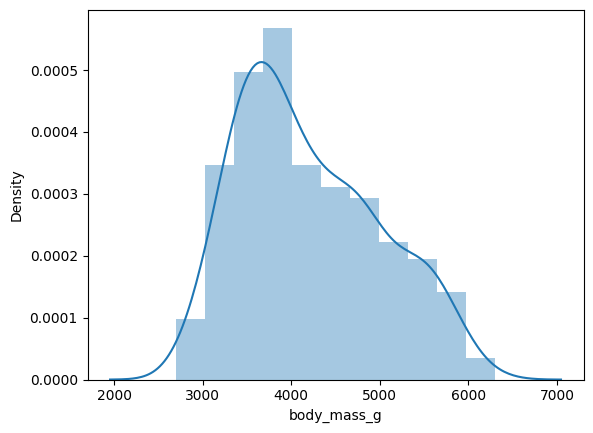

In [25]:
sns.distplot(penguins['body_mass_g']) 

In [26]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,195.000000,3250.000000,0
3,0,2,43.92193,17.15117,200.915205,4201.754386,2
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


In [27]:

#split data into independent variable and dependent variable
x=penguins.drop(['body_mass_g'],axis=1)#independent variable
y=penguins['body_mass_g']# dependent variable

In [28]:
x.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
0,0,2,39.10000,18.70000,181.000000,1
1,0,2,39.50000,17.40000,186.000000,0
2,0,2,40.30000,18.00000,195.000000,0
3,0,2,43.92193,17.15117,200.915205,2
4,0,2,36.70000,19.30000,193.000000,0


In [29]:
y.head()

0    3750.000000
1    3800.000000
2    3250.000000
3    4201.754386
4    3450.000000
Name: body_mass_g, dtype: float64

In [30]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler= scaler.fit_transform(x)
x_scaler

array([[-1.0298023 ,  1.84407623, -0.88708123,  0.78774251, -1.42248782,
         0.80247526],
       [-1.0298023 ,  1.84407623, -0.81349399,  0.12655633, -1.06535169,
        -0.99006688],
       [-1.0298023 ,  1.84407623, -0.66631952,  0.43171918, -0.42250666,
        -0.99006688],
       ...,
       [ 1.21229891, -0.91402039,  1.1917582 , -0.73807176,  1.50602843,
         0.80247526],
       [ 1.21229891, -0.91402039,  0.23512413, -1.19581604,  0.79175618,
        -0.99006688],
       [ 1.21229891, -0.91402039,  1.09977416, -0.53462985,  0.8631834 ,
         0.80247526]], shape=(344, 6))

## check VIF 
### measure of the amount of multicollinearity in regression analysis

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=x_scaler
vif=pd.DataFrame()
vif['Variance Inflation Factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['Features']=x.columns
vif

,Variance Inflation Factor,Features
0,11.807162,species
1,1.777154,island
2,3.919930,bill_length_mm
3,4.412630,bill_depth_mm
4,4.313181,flipper_length_mm
5,1.500540,sex


In [32]:
x=x.drop('species',axis=1)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,shuffle=True,random_state=10)
x_train

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
315,0,50.8,15.7,226.0,1
181,1,52.8,20.0,205.0,1
25,0,35.3,18.9,187.0,0
164,1,47.0,17.3,185.0,0
247,0,47.8,15.0,215.0,1
...,...,...,...,...,...
123,2,41.4,18.5,202.0,1
320,0,48.5,15.0,219.0,0
15,2,36.6,17.8,185.0,0
125,2,40.6,19.0,199.0,1


In [34]:
x_test

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
229,0,46.8,15.4,215.0,1
80,2,34.6,17.2,189.0,0
327,0,53.4,15.8,219.0,1
6,2,38.9,17.8,181.0,0
309,0,52.1,17.0,230.0,1
...,...,...,...,...,...
202,1,48.1,16.4,199.0,0
114,0,39.6,20.7,191.0,0
324,0,47.3,13.8,216.0,2
100,0,35.0,17.9,192.0,0


In [35]:
y_train

315    5200.0
181    4550.0
25     3800.0
164    3700.0
247    5650.0
        ...  
123    3875.0
320    4850.0
15     3700.0
125    4000.0
265    4900.0
Name: body_mass_g, Length: 275, dtype: float64

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model=LinearRegression()

In [38]:
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
model.intercept_

np.float64(-3968.425033310773)

In [40]:
model.coef_

array([-146.90890656,    1.03551132,  -14.82080299,   41.3473201 ,
        305.90009027])

### Model Testing

In [41]:
model.predict(x)

array([3290.86165862, 3211.37941726, 3575.44122542, 4448.15016486,
       3469.75170058, 3635.0351161 , 2998.09318877, 3856.48896846,
       4096.64451528, 3949.65940813, 3825.86546946, 3574.81738826,
       3044.68279437, 3666.76509648, 3953.5363722 , 3161.10079314,
       3558.96360432, 3926.29791272, 3108.58286634, 3794.02359965,
       2993.93029724, 3541.88243578, 3598.83390454, 3758.02927374,
       3565.25270272, 3519.96419845, 3670.40945921, 3540.1696603 ,
       2906.89296727, 3541.81770688, 3037.88432511, 3320.65361516,
       3435.05464282, 3560.71228525, 3733.13244082, 4022.51399063,
       3790.31874879, 3096.69740049, 3121.42472613, 3556.6090622 ,
       3180.90002766, 4022.83965671, 3338.36115091, 4048.33712028,
       3321.76262691, 3808.93212143, 3476.74266701, 3656.35503654,
       3512.6429131 , 3817.50539492, 3500.85454061, 3872.18206315,
       3658.51630834, 4361.42489406, 3530.99243178, 4002.01642906,
       3503.19739441, 4080.91849961, 3307.21073831, 4114.71304

In [42]:
y_pred=model.predict(x)

In [43]:
y_pred

array([3290.86165862, 3211.37941726, 3575.44122542, 4448.15016486,
       3469.75170058, 3635.0351161 , 2998.09318877, 3856.48896846,
       4096.64451528, 3949.65940813, 3825.86546946, 3574.81738826,
       3044.68279437, 3666.76509648, 3953.5363722 , 3161.10079314,
       3558.96360432, 3926.29791272, 3108.58286634, 3794.02359965,
       2993.93029724, 3541.88243578, 3598.83390454, 3758.02927374,
       3565.25270272, 3519.96419845, 3670.40945921, 3540.1696603 ,
       2906.89296727, 3541.81770688, 3037.88432511, 3320.65361516,
       3435.05464282, 3560.71228525, 3733.13244082, 4022.51399063,
       3790.31874879, 3096.69740049, 3121.42472613, 3556.6090622 ,
       3180.90002766, 4022.83965671, 3338.36115091, 4048.33712028,
       3321.76262691, 3808.93212143, 3476.74266701, 3656.35503654,
       3512.6429131 , 3817.50539492, 3500.85454061, 3872.18206315,
       3658.51630834, 4361.42489406, 3530.99243178, 4002.01642906,
       3503.19739441, 4080.91849961, 3307.21073831, 4114.71304

In [44]:
penguins['body_mass_g']

0      3750.000000
1      3800.000000
2      3250.000000
3      4201.754386
4      3450.000000
          ...     
339    4201.754386
340    4850.000000
341    5750.000000
342    5200.000000
343    5400.000000
Name: body_mass_g, Length: 344, dtype: float64

In [45]:
y_pred

array([3290.86165862, 3211.37941726, 3575.44122542, 4448.15016486,
       3469.75170058, 3635.0351161 , 2998.09318877, 3856.48896846,
       4096.64451528, 3949.65940813, 3825.86546946, 3574.81738826,
       3044.68279437, 3666.76509648, 3953.5363722 , 3161.10079314,
       3558.96360432, 3926.29791272, 3108.58286634, 3794.02359965,
       2993.93029724, 3541.88243578, 3598.83390454, 3758.02927374,
       3565.25270272, 3519.96419845, 3670.40945921, 3540.1696603 ,
       2906.89296727, 3541.81770688, 3037.88432511, 3320.65361516,
       3435.05464282, 3560.71228525, 3733.13244082, 4022.51399063,
       3790.31874879, 3096.69740049, 3121.42472613, 3556.6090622 ,
       3180.90002766, 4022.83965671, 3338.36115091, 4048.33712028,
       3321.76262691, 3808.93212143, 3476.74266701, 3656.35503654,
       3512.6429131 , 3817.50539492, 3500.85454061, 3872.18206315,
       3658.51630834, 4361.42489406, 3530.99243178, 4002.01642906,
       3503.19739441, 4080.91849961, 3307.21073831, 4114.71304

In [54]:
from sklearn.metrics as metrics
mean_absolute_error(penguins['body_mass_g'],y_pred)


SyntaxError: invalid syntax (2501224790.py, line 1)